<div style="text-align: center; margin: auto; background:#b4cc3d; padding:10px; color:white; font-family:Calibri ;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width:120px; padding-top: 20px;">
    <h1  style="font-size:2.8rem">Data Mining Project: ABCDEats Customer Data</h1>
    <h2  style="font-size:2rem">Data Preprocessing and Feature Selection</h2>
    <p style='font-size:1.2rem;'>NOVA Information Management School </p>    
    <p style='font-size:1.2rem;'>Master in Data Science and Advanced Analytics</p>    
    <img src="https://cdni.iconscout.com/illustration/premium/thumb/food-delivery-service-by-scooter-illustration-download-in-svg-png-gif-file-formats--on-pack-e-commerce-shopping-illustrations-4403764.png" style="width:33rem;">
    <p style='font-size:1.3rem; padding:0; margin:0; font-weight:bold;'>Group 41 members:</p>
    <ul style='font-size:1.2rem; list-style-position: inside; padding-left:0; border:none;'>
        <li>Elcano Gaspar (20241021)</li>
        <li>Gasper Pereira (20230984)</li>
        <li>Pedro Costa (20222121)</li>
        <li>Rita Wang (20240551)</li>
    </ul> 
    <br>
    <p style='font-size:1.2rem; '>      Fall/Spring Semester 2024-2025</p>
</div>

<h1 id='imports'>0. Imports and Dataset Loading</h1>

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings

from itertools import combinations
from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


from functions import * 


from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from scipy.stats import skew

In [2]:
df = pd.read_csv("../Project data/DM2425_ABCDEats_DATASET.csv")

<h1 id='dataexploration'>1. Data Exploration</h1>

<h2 id='initial-analysis'>1.1 Initial analysis of the dataset</h2>

In [3]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<h2 id='missing-values'>1.2 Check for Missing Values</h2>


In [5]:
missing_data(df)

,Missing Count,Missing %
HR_0,1165,3.65
customer_age,727,2.28
first_order,106,0.33


Missing values in HR_0, customer_age and first_order. We'll look into taking care of these afterwards.\
`Low Missingness (<5%)`: HR_0, Customer_age and First_order (can be imputed without introducing bias)

<h2>1.3 Change index to customer_id</h2>

> Before setting customer_id to index, we should check for any duplicates first.

In [6]:
df[df.duplicated(keep=False)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0


> There are 13 duplicates, note that its curious how they all have the same customer_region 8550. Since we don't consider these to be actual cases, and simply input error, we'll delete the duplicates.

In [7]:
df_original = df.copy()
df = df.drop_duplicates()
df_original.shape[0] - df.shape[0] #Display number of duplicates dropped

13

> Now let's set customer_id as the index.

In [8]:
df.set_index("customer_id", inplace=True)

<h2 id='duplicates'>1.4 Duplicate Values</h2>

> After setting customer_id as index, we should check again for duplicate values.

In [9]:
df[df.duplicated(keep=False)] 

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
412c8c0b2d,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,1,0,0,0
4336560739,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,1,0,0,0
11a56d6fbf,4660,32.0,3,4,3,1.0,43,-,CARD,10.15,...,0,1,2,0,0,0,0,0,0,0
dcc76a0a1b,4660,32.0,3,4,3,1.0,43,-,CARD,10.15,...,0,1,2,0,0,0,0,0,0,0
839055942a,4660,25.0,4,5,5,3.0,69,-,CARD,11.59,...,0,1,1,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29d575f3cc,8670,31.0,1,2,0,82.0,82,-,CARD,0.00,...,0,0,0,0,1,0,0,0,0,0
4ff02cb613,8670,30.0,1,1,0,83.0,83,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
a6bdd77ae2,8670,30.0,1,1,0,83.0,83,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0


In [10]:
n_dups = len(df[df.duplicated(keep=False)]) / 2
n_dups # 47 
df_len_prev = df.shape[0]
df = df.drop_duplicates()
n_dups_droped = df_len_prev - df.shape[0]
n_dups_droped

47

<h2 id='data-types'>1.5 Data types</h2>

In [11]:
df.dtypes

customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

> <code>customer_age</code>,<code>HR_0</code> and <code>first_order</code> should be int, but are floats right now because of the missing values.

><code>customer_region</code> should be categorical, but we'll change this only after deciding how to group the 3 regions.

<h2 id='variable-analysis'>1.6 Numercal and Categorical Variables</h2>

Separating the variables in continuous and categorical to make the analysis of the variables easier.
| Numerical Variables | Categorical Variables |
| --- | --- |
| customer_age | customer_region |
| vendor_count |last_promo  |
| product_count | payment_method |
|is_chain| |
|first_order||
|last_order||
|CUI||
|HR_0 to HR_23||
|DOW_0 to DOW_6||

In [12]:
numerical = ['customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order',
        'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

categorical = ['customer_region','last_promo','payment_method']

> Let's create variables saving all of the HR, DOW, and CUI together:

In [13]:
hr_cols = [col for col in df.columns if "HR" in col]
dow_cols = [col for col in df.columns if "DOW" in col]
CUI_cols = [col for col in df.columns if "CUI" in col]

<h2>1.7 Unique values</h2>

<h3>1.7.1 Values in Numerical</h3>

In [14]:
for column in numerical:
    print(f'{column}:{df[column].unique()}')

customer_age:[18. 17. 38. nan 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19.
 28. 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43.
 44. 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80.
 63. 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]
vendor_count:[ 2  1  3  4  5  7  6 11  9  8 12 14 20 13 10 16 24 18 17 15 25 30 19 21
 23 22 28 32 41 40 26  0 27 34 31 35 29]
product_count:[  5   2   3   4   6  10   8  17   7  26   9  32  15  13  16  28  19  12
  18  11  25  14  23  29  21  31  95  24  64  27  37  49  22  41  51  34
  39  20  30  47  40  53  38  54  35  33  56  65  45  63  36  79  48  70
  44  84  46  66  57  58  83 110 117 269  75  55  42  81  91  43  69  67
  72  59   1   0  77  97  87  73  76  60 109  52  62  94  80  89  61  82
  50  88  68]
is_chain:[ 1  2  0  3  5  4  7 12  6 23  8 11 20 14  9 10 16 15 13 25 17 27 30 32
 24 18 26 28 22 40 31 39 21 37 19 33 65 38 29 45 47 73 81 56 35 46 67 44
 61 34 36 49 83 75 43 42 48 63 54 80]
f

In [15]:
df[df['HR_0'].isna()]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
ae38da6386,8670,21.0,2,3,1,0.0,7,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
a21a839c77,4140,19.0,1,4,4,0.0,21,-,CARD,0.00,...,0,0,0,0,0,1,0,0,1,0
9237d23413,8670,22.0,3,4,2,0.0,27,-,CARD,5.77,...,0,0,0,0,0,0,0,0,0,0
8c6ffd7357,4660,25.0,3,4,1,0.0,28,-,CARD,27.54,...,0,1,0,0,0,0,0,0,0,0
67c6c9f9c4,4660,24.0,1,3,0,0.0,36,FREEBIE,DIGI,0.00,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37b72b449d,2360,23.0,1,4,0,85.0,85,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
ac382ddfd1,-,28.0,1,2,2,87.0,89,DELIVERY,CARD,0.00,...,0,0,0,0,0,0,0,0,0,1
96f1fc25e3,8670,25.0,2,2,1,88.0,88,DELIVERY,CASH,0.00,...,0,0,0,0,0,0,0,0,0,0


> <code>HR_0</code> only has values 0 and NaN, and the other hours don't have missing values. Since these variables count for the number of orders at that hour, and DOW counts for the number of order made in each day of the week, it is safe to assume that the sum of these 2 groups of variables will give us the total number of orders that were made. Since DOW has no missing values, we can obtain the number of total order. 1164 cases where the <code>HR_0</code> is NaN.

<h3>1.7.2 Values in Categorical</h3>

In [16]:
for column in categorical:
    print(f'{column}:{df[column].unique()}')

customer_region:['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
last_promo:['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
payment_method:['DIGI' 'CASH' 'CARD']


> There are 442 rows where the customer region is '-'. We will convert these to NaN now, and then impute it later.

In [17]:
(df['customer_region']=='-').sum()

442

In [18]:
df['customer_region'] = df['customer_region'].replace('-', np.nan)

In [19]:
missing_data(df)

,Missing Count,Missing %
HR_0,1164,3.66
customer_age,727,2.28
customer_region,442,1.39
first_order,106,0.33


> 16748 of the values in last_promo are '-', we will consider this to be the cases where the customers didn't use a promo code. We will convert it to 'NO PROMO' for easier interpretation.

In [ ]:
(df['last_promo']=='-').sum()

16722

In [21]:
# Replace the value '-' in 'last_promo' with 'no promo'
df['last_promo'] = df['last_promo'].replace('-', 'NO PROMO')

print(df['last_promo'].value_counts()) 

last_promo
NO PROMO    16722
DELIVERY     6271
DISCOUNT     4491
FREEBIE      4344
Name: count, dtype: int64


<h2>1.8 Inconherences</h2>

> <code>is_chain</code>'s description says that it indicates whether the customer's order was from a chain restaurant. We will consider the numbers as being the number of times that a customer has ordered from a chain restaurant.


> Let's check for rows where CUI or DOW is zero, and drop those.

In [22]:
filtered_df = df[((df[CUI_cols] == 0).all(axis=1) | (df[dow_cols] == 0).all(axis=1))]

filtered_df

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,0,0,0
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,0,0,0,0
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,0,0,0
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,0,0,0,0
1b7c34738e,8670,24.0,0,0,0,3.0,3,NO PROMO,CASH,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,NO PROMO,DIGI,0.0,...,0,0,0,0,0,0,0,0,0,0
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,0,0,0,0
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,0,0,0,0


> We should drop these rows

In [23]:
before = df.shape[0]

In [24]:
# Drop rows where 'is_chain' != 0 and all values in 'CUI_cols' and 'dow_cols' are 0
df = df[~((df[CUI_cols] == 0).all(axis=1) & (df[dow_cols] == 0).all(axis=1))]

df
after=df.shape[0]

In [25]:
before-after

138

> Product count: is zero, but there were purchases made. As there are values in DOW columns, and it's 1.

In [26]:
df[df["product_count"] == 0].shape # 18 cases

(18, 55)

In [27]:
df[df["product_count"] == 0].head(5)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
aed85972bb,4660,27.0,1,0,0,6.0,6,DISCOUNT,CARD,0.0,...,0,0,0,0,1,0,0,0,0,0
b2ebe2e6e0,4660,43.0,1,0,0,6.0,6,NO PROMO,CARD,0.0,...,1,0,0,0,0,0,0,0,0,0
6f723d9894,4660,36.0,1,0,0,13.0,13,DELIVERY,CASH,0.0,...,1,0,0,0,0,0,0,0,0,0
9d74f2ac81,4660,27.0,1,0,0,19.0,19,DELIVERY,CARD,0.0,...,0,0,0,1,0,0,0,0,0,0
27b7eed8fa,4660,35.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
df["product_count"] = np.where((df["product_count"] == 0) & (df[dow_cols].sum(axis=1) > 0), 1, df["product_count"])

df[df["product_count"] == 0].shape # 0 cases

(0, 55)

<h1 id='univariate'>2. Univariate analysis</h1>

<h2 id='numerical'>2.1 Numerical variables</h2>

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,30963.0,27.510351,7.165122,15.0,23.0,26.0,31.0000,80.00
vendor_count,31690.0,3.116157,2.770552,1.0,1.0,2.0,4.0000,41.00
product_count,31690.0,5.693500,6.962131,1.0,2.0,3.0,7.0000,269.00
is_chain,31690.0,2.829378,3.983606,0.0,1.0,2.0,3.0000,83.00
first_order,31584.0,28.391559,24.069555,0.0,7.0,22.0,44.0000,90.00
last_order,31690.0,63.749511,23.185617,0.0,49.0,70.0,83.0000,90.00
CUI_American,31690.0,4.899962,11.673741,0.0,0.0,0.0,5.7175,280.21
CUI_Asian,31690.0,10.002830,23.613427,0.0,0.0,0.0,11.8700,896.71
CUI_Beverages,31690.0,2.306775,8.487756,0.0,0.0,0.0,0.0000,229.22
CUI_Cafe,31690.0,0.805655,6.446599,0.0,0.0,0.0,0.0000,326.10


In [30]:
numericals = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
subset = [x for x in numericals if x not in hr_cols and x not in CUI_cols and x not in dow_cols]


In [31]:
# plot_distribution_grid(df,subset)

In [32]:
# plot_distribution_grid(df,hr_cols)

In [33]:
# plot_distribution_grid(df,dow_cols)

In [34]:
# plt.figure(figsize=(10, 6))
# plt.hist(df.first_order, bins=91, alpha=0.5, label='First Order', color='#308dff', edgecolor='black')
# plt.hist(df.last_order, bins=91, alpha=0.5, label='Last Order', color='green', edgecolor='black')
# plt.xlabel('Days from Start of Dataset')
# plt.ylabel('Frequency')
# plt.title('Overlap of first_order and last_order')
# plt.legend()
# plt.show()

In [35]:
# totals = {}
# df[CUI_cols].describe().T
# for col in CUI_cols:
#     totals[col] = df[col].sum()
# totals = pd.Series(totals)
# totals.sort_values(ascending=False).plot(kind="bar")

In [36]:
# cui_totals = df[CUI_cols].sum().sort_values(ascending=False)
# cui_percentages = (cui_totals / cui_totals.sum()) * 100
# cui_percentages

In [37]:
# #Calculate the percentage of zeros per cuisine
# for col in CUI_cols:
#     zero_orders = (df[col] == 0).mean() * 100
#     print(f"% of customers who never ordered {col}: {zero_orders:.2f}%")

In [38]:
# dof = {}
# for col in dow_cols:
#     dof[col] = df[col].sum()
# dof = pd.Series(dof)
# x = np.arange(len(dof))
# y = dof.values
# m, b = np.polyfit(x, y, 1) # linear regression; m = slope; b = intercept
# dof.plot(kind="bar")
# plt.plot(x, m*x + b, color="red", linestyle="--", label="trend")
# plt.legend()

In [39]:
# hours = {}
# hr_cols = [col for col in df.columns if "HR" in col]
# df[hr_cols].describe().T
# for col in hr_cols:
#     hours[col] = df[col].sum()
# hours = pd.Series(hours)
# hours.plot(kind="bar")

<h2 id='categorical'>2.2 Categorical variables</h2>

In [40]:
df.describe(include="object").T

,count,unique,top,freq
customer_region,31248,8,8670,9610
last_promo,31690,4,NO PROMO,16671
payment_method,31690,3,CARD,20065


In [41]:
cat_cols = [col for col in df.columns if df[col].dtype == object or df[col].dtype == bool]

In [42]:
# plot_categorical_distributions(df,cat_cols)

In [43]:
#Percentage for payment method
df['payment_method'].value_counts(normalize=True) * 100

payment_method
CARD    63.316504
DIGI    19.097507
CASH    17.585989
Name: proportion, dtype: float64

In [44]:
#Calculate the number and percentages of customer region
region_counts = df['customer_region'].value_counts()

region_percentages = df['customer_region'].value_counts(normalize=True) * 100

region_summary = pd.DataFrame({
    'Count': region_counts,
    'Percentage': region_percentages
})
region_summary['Percentage'] = region_summary['Percentage'].round(2)
region_summary

,Count,Percentage
customer_region,,
8670,9610,30.75
4660,9533,30.51
2360,8815,28.21
2440,1482,4.74
4140,856,2.74
8370,495,1.58
2490,444,1.42
8550,13,0.04


<h1 id='data-preprocessing'>3. Data preprocessing</h1>

<h2>3.1 Missing Values</h2>

In [45]:
missing_data(df)

,Missing Count,Missing %
HR_0,1164,3.67
customer_age,727,2.29
customer_region,442,1.39
first_order,106,0.33


<h3>3.1.1 First Order</h3>

> Impute using total_orders taht is calculated by addig up the dow columns.

In [46]:
df["first_order"] = np.where(df.first_order.isna(), df.last_order, df.first_order)

df.first_order.isna().sum()


0

<h3>3.1.2 HR_0</h3>

> Imputed by calculating the difference between total_hours and total_days

In [47]:
# Creathe column total_hours and total_days
df["total_hours"] = df[hr_cols].apply(lambda x: x.sum(), axis=1)
df["total_days"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)

In [48]:
# Use the created columns to impute HR_0
df["HR_0"] = np.where(df.HR_0.isna(), df.total_days - df.total_hours, df.HR_0)

# Drop the created columns
df.drop(columns=["total_hours", "total_days"], inplace=True)

# Check if there are still missing values
df.HR_0.isna().sum()

0

<h3>3.1.3 Customer Age and Region</h3>

> Let's impute customer age and region with KNN imputer. 

> Note that it is necessart to label encode costumer_region and then after imputing map it back.

In [49]:
df_to_impute = df.copy()

In [50]:
# Encode customer_region using LabelEncoder
label_encoder = LabelEncoder()
df_to_impute.loc[df_to_impute["customer_region"].notna(), "customer_region"] = label_encoder.fit_transform(
    df_to_impute.loc[df_to_impute["customer_region"].notna(), "customer_region"]
)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [51]:
# Select numerical columns, including customer_age and customer_region
num_cols = [col for col in df_to_impute.columns if df_to_impute[col].dtype != object and df_to_impute[col].dtype != bool]
num_cols.append("customer_region")


In [52]:
index_age = df_to_impute[df_to_impute["customer_age"].isna()].index

In [55]:
# Scale numerical columns
scaler = StandardScaler()
df_to_impute[num_cols] = scaler.fit_transform(df_to_impute[num_cols])

In [53]:
# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_to_impute[num_cols] = imputer.fit_transform(df_to_impute[num_cols])

In [56]:
# Reverse scaling for interpretability
df_to_impute[num_cols] = scaler.inverse_transform(df_to_impute[num_cols])

In [57]:
# Round and decode customer_region back to its original labels
df_to_impute["customer_region"] = df_to_impute["customer_region"].round().astype(int)
label_map_invert = {value: key for key, value in label_mapping.items()}
df_to_impute["customer_region"] = df_to_impute["customer_region"].replace(label_map_invert)

# Round customer_age to nearest integer if needed
df_to_impute["customer_age"] = df_to_impute["customer_age"].round().astype(int)

In [58]:
df['customer_age']=df_to_impute['customer_age']
df['customer_region']=df_to_impute['customer_region']

In [59]:
print("As we can see, we no longer have missing values:")
missing_data(df)

As we can see, we no longer have missing values:


,Missing Count,Missing %


In [554]:
for cui in CUI_cols:
    df[cui] = np.abs(df[cui])

In [555]:
df[df['first_order']>df['last_order']]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,


<h2> 3.2 Data types</h2>

In [556]:
df.dtypes

customer_region              object
customer_age                  int32
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

> Where is float should be int, except for CUI because that's a monetary unit.

In [60]:
to_int = ['vendor_count','product_count','is_chain','first_order','last_order'] + hr_cols + dow_cols
df[to_int] = df[to_int].astype(int)
df.dtypes

customer_region              object
customer_age                  int32
vendor_count                  int32
product_count                 int32
is_chain                      int32
first_order                   int32
last_order                    int32
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int32
DOW_1                         int32
DOW_2                         int32
DOW_3                       

<h2 id='feature-engineering'>3.4 Feature engineering</h2>

<h3 id='numerical-new'> 3.4.1 Numerical new features</h3>

> 1. <code>total_orders</code>: The sum of the DOW columns gives us the total number of orders made by that customer. 
> 
> 2. <code>percentage_chain</code>: From the total orders made by the customer, what percentage is from a chain restaurant.
>
> 3. <code>customer_lifetime</code>: The number of days between the last order and first order (not sure to keep this one, since the customer_lifetime doesn't indicate much about the customer since they could have signed up later on).
>
> 4. <code>order_freq</code>: Average number of orders per week made by a customer over their customer lifetime. (Not sure if it makes sense since some customers could have lifetime less than a week).
>
>5. <code>avg_time_between_orders</code>: Avergae time (in days) between each order for a customer based on their lifetime and the total number of orders they've placed.
>
>6. <code>total_spent_log</code>: log transformed total spent
>
>7. <code>avg_order_value</code>: Average value of each order for a customer, based on their total spending and the total number of orders they placed.
>
> 8. <code>products_per_vendor</code>: Average of products purchased per vendor
>
> 9. 

In [61]:
df["total_orders"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)
df["percentage_chain"] =  df.is_chain / df.total_orders * 100
df["customer_lifetime"] = df.last_order - df.first_order
df["weekly_order_frequency"] = (np.where(df.customer_lifetime== 0,  df.total_orders / (1/ 7), df.total_orders / (df.customer_lifetime / 7)))
df["avg_time_between_orders"] = (df.customer_lifetime / df.total_orders).round()
df["total_spent"] = df[CUI_cols].apply(lambda x: x.sum(), axis=1)
df["total_spent_log"] = np.log(df["total_spent"]) 
df["avg_order_value"] =  (df.total_spent / df.total_orders).round(2)

df["products_per_vendor"] = round(df.product_count / df.vendor_count)

# Weekend vs. Week
df["weekend_orders"] = df[["DOW_0", "DOW_6"]].apply(lambda x: x.sum(), axis=1)
df["week_orders"] = df[["DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5"]].apply(lambda x: x.sum(), axis=1)
df["weekend_orders_percent"] = df["weekend_orders"] / df["total_orders"] * 100
df.drop(columns=["weekend_orders", "week_orders"], inplace=True)

# Cuisine percent
for cuisine in CUI_cols:
    df[cuisine + "_percent"] = df[cuisine] / df[CUI_cols].sum(axis=1) * 100

# AM vs. PM
df["AM_hours"] = df[hr_cols[:13]].apply(lambda x: x.sum(), axis=1)
df["PM_hours"] = df[hr_cols[13:]].apply(lambda x: x.sum(), axis=1)
df["AM_preference_percent"] = df["AM_hours"] / df["total_orders"] * 100
df.drop(columns=["AM_hours", "PM_hours"], inplace=True)

df['recency']=90-df['last_order']

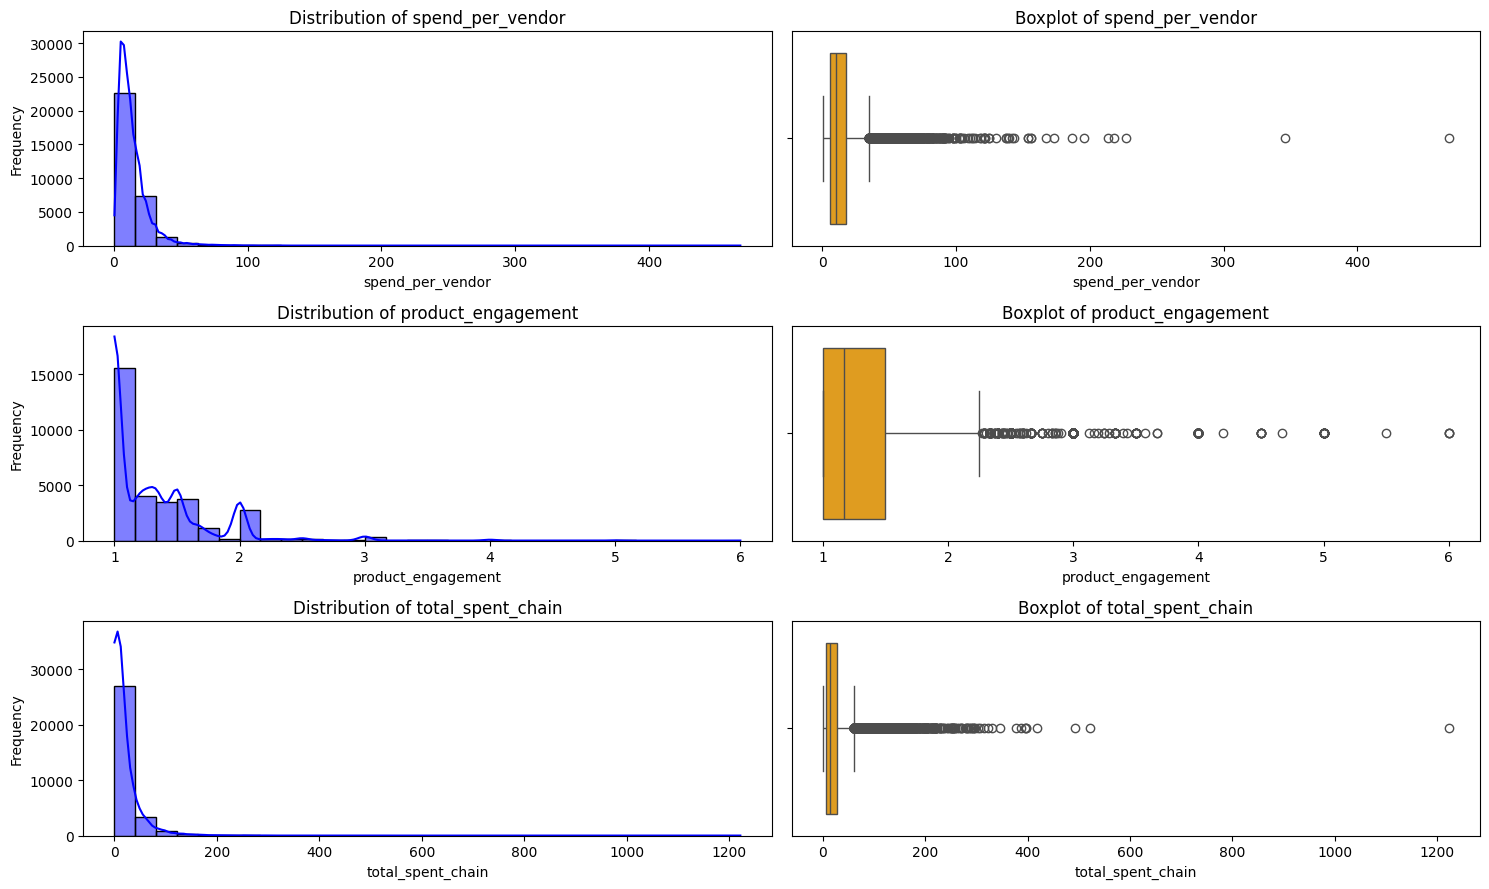

In [62]:
df['spend_per_vendor'] = df['total_spent'] / df['vendor_count']
df["product_engagement"] = df["product_count"] / df["total_orders"]
chain_order_ratio = df['is_chain'] / df['total_orders']
df['total_spent_chain'] = df['total_spent'] * chain_order_ratio
plot_distribution_and_boxplot(df, ["spend_per_vendor", "product_engagement", "total_spent_chain"])

In [63]:
df[["spend_per_vendor", "total_spent_chain", "product_engagement"]].describe().T

,count,mean,std,min,25%,50%,75%,max
spend_per_vendor,31690.0,13.513616,12.049779,0.37,6.11,10.461833,17.609500,468.330000
total_spent_chain,31690.0,21.797183,29.335498,0.00,5.32,13.350000,27.584464,1222.177979
product_engagement,31690.0,1.299421,0.417222,1.00,1.00,1.166667,1.500000,6.000000


c:\Users\emano\Documents\NOVA\Data Mining\Projeto-Data-Mining\Part 2\functions.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


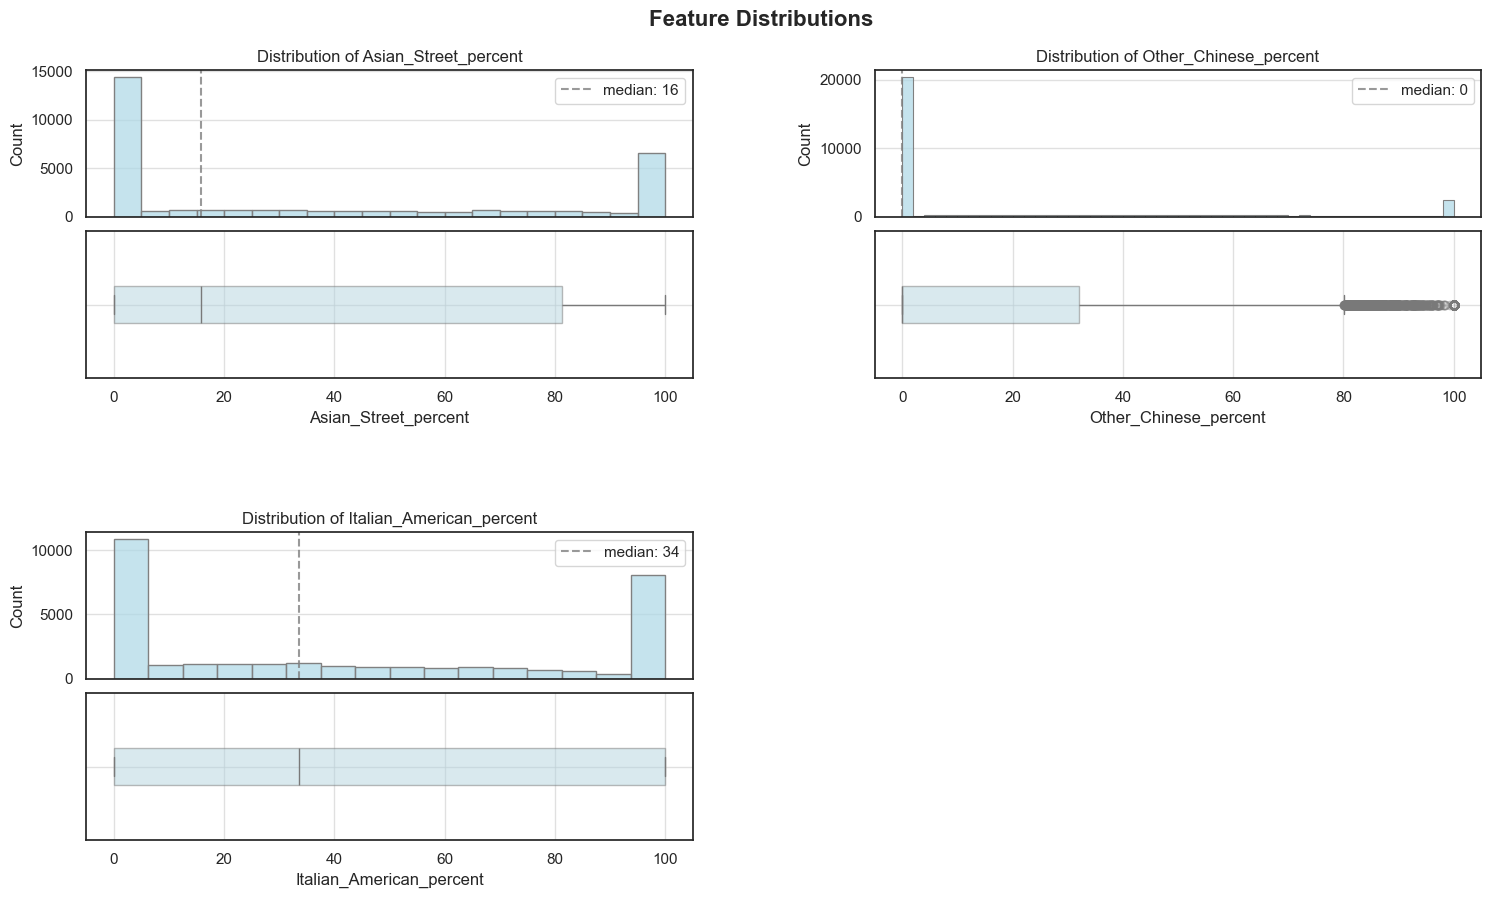

In [64]:
df["Asian_Street_percent"] = df[["CUI_Asian_percent", "CUI_Street Food / Snacks_percent", "CUI_Beverages_percent", "CUI_Desserts_percent"]].apply(lambda x: x.sum(), axis=1)

df["Other_Chinese_percent"] = df[["CUI_OTHER_percent", "CUI_Chicken Dishes_percent", "CUI_Chinese_percent", "CUI_Noodle Dishes_percent"]].apply(lambda x: x.sum(), axis=1)

df["Italian_American_percent"] = df[["CUI_Italian_percent", "CUI_Indian_percent", "CUI_Thai_percent", "CUI_American_percent", "CUI_Japanese_percent", "CUI_Cafe_percent", "CUI_Healthy_percent"]].apply(lambda x: x.sum(), axis=1)

new_cui_agg = ["Asian_Street_percent", "Other_Chinese_percent", "Italian_American_percent"]

plot_distribution_grid(df, new_cui_agg)


In [65]:
# list with all the cuisine percents

# Save new features in a list
new_features_numerical = ['total_orders','percentage_chain','customer_lifetime',
                          'weekly_order_frequency','avg_time_between_orders',
                          'total_spent_log',
                          'avg_order_value','products_per_vendor',
                          'AM_preference_percent','weekend_orders_percent','recency', "spend_per_vendor", "product_engagement", "total_spent_chain"]  + new_cui_agg

> new_num_cols will be a list with the new features and after removal of ones we won't use: CUI, DOW,H4 and total_spent

In [66]:
num_cols.remove('customer_region')

In [67]:
# Update the num_cols list
new_num_cols = num_cols + new_features_numerical

> Consider dropping first_order and last_order, since we have recency that is the same.

In [68]:
df[new_features_numerical].describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
total_orders,31690.0,4.3879,5.0878,1.0000,2.0000,3.0000,5.0000,94.0000
percentage_chain,31690.0,62.7007,38.7099,0.0000,33.3333,71.4286,100.0000,100.0000
customer_lifetime,31690.0,35.4529,29.4094,0.0000,3.0000,34.0000,62.0000,90.0000
weekly_order_frequency,31690.0,2.6320,3.1637,0.1573,0.5526,0.9825,5.0968,28.0000
avg_time_between_orders,31690.0,8.4741,7.8983,0.0000,1.0000,7.0000,13.0000,44.0000
total_spent_log,31690.0,3.1883,0.9677,-0.9943,2.5665,3.1864,3.8117,7.2572
avg_order_value,31690.0,10.3055,7.8589,0.3700,5.0700,8.2200,12.9300,104.3200
products_per_vendor,31690.0,1.8226,1.3609,1.0000,1.0000,2.0000,2.0000,70.0000
AM_preference_percent,31690.0,46.6590,41.0997,0.0000,0.0000,45.3079,100.0000,100.0000
weekend_orders_percent,31690.0,29.0124,31.2285,0.0000,0.0000,25.0000,50.0000,100.0000


In [567]:
# plot_distribution_and_boxplot(df,new_features_numerical)

<h3 id='categorical-new'> 3.4.2 Categorical new features</h3>

In [69]:
df["active_customer"] = np.where((df.last_order >= 60), True, False)
df["recent_customer"] = np.where((df.first_order >= 60), True, False)
df["churning_customer"] = np.where((df.last_order < 60), True, False)

df["customer_activity"] = np.where((df.churning_customer == True), "Churning",
                                   np.where((df.recent_customer == True), "Recent", "Active"))
df.drop(columns=["active_customer", "recent_customer", "churning_customer"], inplace=True)


In [70]:
new_features_categorical = ['customer_activity']

In [71]:
new_cat_cols = cat_cols + new_features_categorical

In [571]:
# plot_categorical_distributions(df,new_features_categorical)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.pyplot as plt

# Select features for clustering
features = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'total_orders', 'total_spent', 'avg_order_value']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

# Visualize the clusters
sns.pairplot(df, hue='cluster', vars=features)
plt.show()

         customer_age  vendor_count  product_count   is_chain  total_orders  \
cluster                                                                       
0           27.581047      6.128515      12.138742   6.041248      9.153741   
1           27.489953      2.079417       3.194740   1.565927      2.546153   
2           27.605232     12.897741      34.956005  17.953627     25.851367   

         total_spent  avg_order_value  
cluster                                
0          78.743772         9.341998  
1          23.847248        10.612359  
2         191.619893         7.913294  


<h2>3.5 Skewness of Data</h2>

> As we can see, our variables are highly skewed. Let's check

In [572]:
# Remove columns with "percent" in their names
new_num_cols_without_percent = [col for col in new_num_cols if "percent" not in col.lower()]
new_num_cols_without_percent = [col for col in new_num_cols_without_percent if col not in dow_cols]
new_num_cols_without_percent = [col for col in new_num_cols_without_percent if col not in hr_cols]
new_num_cols_without_percent = [col for col in new_num_cols_without_percent if col not in CUI_cols]


print(new_num_cols_without_percent)


['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'total_orders', 'customer_lifetime', 'weekly_order_frequency', 'avg_time_between_orders', 'total_spent_log', 'avg_order_value', 'products_per_vendor', 'recency', 'spend_per_vendor', 'product_engagement', 'total_spent_chain']


products_per_vendor        10.220047
product_count               5.717809
spend_per_vendor            5.645454
total_spent_chain           5.603478
is_chain                    4.985804
total_orders                4.540797
vendor_count                3.027450
product_engagement          2.523056
avg_order_value             2.437983
weekly_order_frequency      1.718484
customer_age                1.567175
avg_time_between_orders     1.114304
recency                     0.934679
first_order                 0.758056
customer_lifetime           0.200049
total_spent_log            -0.086268
last_order                 -0.934679
dtype: float64
Features with skewness above 1.5: ['products_per_vendor', 'product_count', 'spend_per_vendor', 'total_spent_chain', 'is_chain', 'total_orders', 'vendor_count', 'product_engagement', 'avg_order_value', 'weekly_order_frequency', 'customer_age']


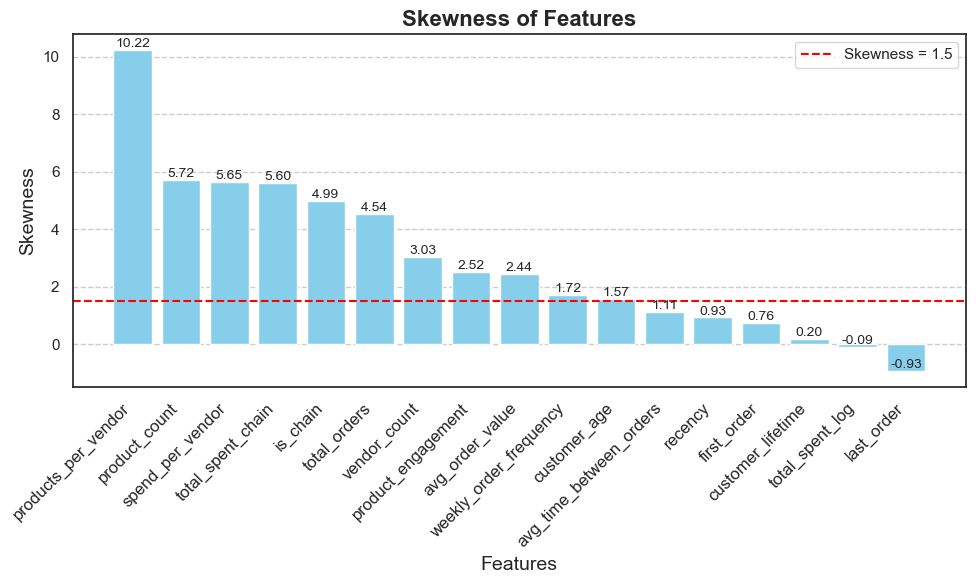

In [573]:
skewness = df[new_num_cols_without_percent].apply(lambda x: skew(x, nan_policy='omit'))

sorted_skewness = skewness.sort_values(ascending=False)

print(sorted_skewness)

high_skew_features = sorted_skewness[sorted_skewness > 1.5].index.tolist()
print(f"Features with skewness above 1.5: {high_skew_features}")


plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_skewness.index, sorted_skewness, color='skyblue')
plt.axhline(y=1.5, color='red', linestyle='--', label="Skewness = 1.5")
plt.title("Skewness of Features", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Skewness", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=1)
plt.legend()

plt.tight_layout()
plt.show()

> For the ones with skewness above 1.5 we will log transform

In [574]:
high_skew_features

['products_per_vendor',
 'product_count',
 'spend_per_vendor',
 'total_spent_chain',
 'is_chain',
 'total_orders',
 'vendor_count',
 'product_engagement',
 'avg_order_value',
 'weekly_order_frequency',
 'customer_age']

In [575]:
for column in high_skew_features:
    df[f'{column}_log'] = np.log1p(df[column])

In [576]:
# num_features = len(high_skew_features)

# num_rows = (num_features * 2 + 1) // 2  
# num_cols = 2 

# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

# axes = axes.flatten()

# for i, column in enumerate(high_skew_features):
#     if i * 2 < len(axes):  # Ensure there are enough axes
#         # Plot original column histogram
#         sns.histplot(df[column], kde=False, ax=axes[i * 2], color='skyblue', bins=30)
#         axes[i * 2].set_title(f"Original: {column}")
#         axes[i * 2].set_xlabel("Value")
#         axes[i * 2].set_ylabel("Frequency")
        
#         # Plot log-transformed column histogram
#         sns.histplot(df[f'{column}_log'], kde=False, ax=axes[i * 2 + 1], color='orange', bins=30)
#         axes[i * 2 + 1].set_title(f"Log-Transformed: {column}")
#         axes[i * 2 + 1].set_xlabel("Log(1 + Value)")
#         axes[i * 2 + 1].set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()


In [577]:
original_skewness = df[high_skew_features].apply(lambda x: skew(x, nan_policy='omit'))

log_skewness = df[[f'{column}_log' for column in high_skew_features]].apply(lambda x: skew(x, nan_policy='omit'))

skew_comparison_original = pd.DataFrame({
    'Skewness': original_skewness
})

skew_comparison_log = pd.DataFrame({
    'Skewness after log': log_skewness
})

skew_comparison_original.reset_index(inplace=True)
skew_comparison_log.reset_index(inplace=True)

skew_comparison_original.rename(columns={'index': 'Feature'}, inplace=True)
skew_comparison_log.rename(columns={'index': 'Feature log'}, inplace=True)

skew_comparison = pd.concat([skew_comparison_original, skew_comparison_log], axis=1)

skew_comparison.drop(columns=['Feature log'], inplace=True)

skew_comparison


,Feature,Skewness,Skewness after log
0,products_per_vendor,10.220047,1.437523
1,product_count,5.717809,0.767075
2,spend_per_vendor,5.645454,0.144030
3,total_spent_chain,5.603478,-0.541073
4,is_chain,4.985804,0.472677
5,total_orders,4.540797,0.879852
6,vendor_count,3.027450,0.824122
7,product_engagement,2.523056,1.559650
8,avg_order_value,2.437983,0.158961
9,weekly_order_frequency,1.718484,0.827073


In [578]:
new_num_cols_transformed = [col for col in new_num_cols if col not in high_skew_features]

In [579]:
new_num_cols_transformed

['first_order',
 'last_order',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'percentage_chain',
 'customer_lifetime',
 'avg_time_between_orders',
 'total_spent_log',
 'AM_preference_percent',
 'weekend_orders_percent',
 'recency',
 'Asian_Street_percent',
 'Other_Chinese_percent',
 'Italian_American_percent']

In [580]:
logs_cols = [col for col in df.columns if "log" in col]

In [581]:
logs_cols.remove("total_spent_log")

In [582]:
new_num_cols_transformed = new_num_cols_transformed + logs_cols

In [583]:
new_num_cols_transformed

['first_order',
 'last_order',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'percentage_chain',
 'customer_lifetime',
 'avg_time_between_orders',
 'total_spent_log',
 'AM_preference_percent',
 'weekend_orders_percent',
 'recency',
 'Asian_Street_percent',
 'Other_Chinese_percent',
 'Italian_American_percent',
 'products_per_vendor_log',
 'product_count_log',
 'spend_per_vendor_log',
 'total_spent_chain_log',
 'is_chain_log',
 'total_orders_log',
 'vendor_count_log',
 'product_eng

<h2> 3.6 Outlier Removal with Transformed Outliers</h2>

In [584]:
# plot_distribution_and_boxplot(df,new_num_cols_transformed)

<h3>3.6.1 Outlier Removal of Existing Variables</h3>

> Let's take a look at the existing variables first

In [585]:
columns_with_outliers = ['customer_age','vendor_count','product_count','is_chain']

In [586]:
right_perc,right_iqr,left_iqr,left_perc = iqr_or_percentile(df,columns_with_outliers,3)

Columns with right outliers (percentile): ['vendor_count', 'product_count', 'is_chain']
Columns with right outliers (IQR): ['customer_age']
Columns with left outliers (IQR): []
Columns with left outliers (percentile): []


In [587]:
df_transformed_wo_outliers = remove_outliers_iqr(df,right_iqr,3)

Upper Bound for customer_age: 55.0
Lower Bound for customer_age: -1.0
--------------------------------------------------
Rows removed for each:{'customer_age': 159}
Total removed:159
Percentage removed:0.5017%


In [588]:
df_transformed_wo_outliers = remove_outliers_percentile(df,right_perc,0,99)

Upper Bound for vendor_count: 14.0
Lower Bound for vendor_count: 1.0
--------------------------------------------------
Upper Bound for product_count: 29.0
Lower Bound for product_count: 1.0
--------------------------------------------------
Upper Bound for is_chain: 14.0
Lower Bound for is_chain: 0.0
--------------------------------------------------
Rows removed for each: {'vendor_count': 268, 'product_count': 269, 'is_chain': 251}
Total removed: 788
Percentage removed: 2.4866%


In [589]:
# compare_figure_outliers(df,df_transformed_wo_outliers,columns_with_outliers)

<h3>3.6.2 Outlier Removal of New Variables</h3>

In [590]:
new_columns_with_outliers = ['avg_time_between_orders',
                            'total_spent_log',
                            'AM_preference_percent',
                            'weekend_orders_percent',
                            'recency',
                            'products_per_vendor_log',
                            'product_count_log',
                            'spend_per_vendor_log',
                            'total_spent_chain_log',
                            'is_chain_log',
                            'total_orders_log',
                            'vendor_count_log',
                            'product_engagement_log',
                            'avg_order_value_log',
                            'weekly_order_frequency_log',
                            'customer_age_log']


> Total orders log seems to be ok, the rest we will still demove.

In [591]:
# compare_figure_outliers(df,df_transformed_wo_outliers,new_columns_with_outliers)

> total_orders_log outliers seem to have been treated already.

In [592]:
right_perc,right_iqr,left_iqr,left_perc = iqr_or_percentile(df_transformed_wo_outliers,new_columns_with_outliers,2)

Columns with right outliers (percentile): ['products_per_vendor_log', 'product_engagement_log']
Columns with right outliers (IQR): ['avg_time_between_orders', 'spend_per_vendor_log', 'total_orders_log', 'avg_order_value_log', 'customer_age_log']
Columns with left outliers (IQR): ['total_spent_log']
Columns with left outliers (percentile): []


In [593]:
df_transformed_wo_outliers=remove_outliers_iqr(df_transformed_wo_outliers,right_iqr,3)

Upper Bound for avg_time_between_orders: 49.0
Lower Bound for avg_time_between_orders: -35.0
--------------------------------------------------
Upper Bound for spend_per_vendor_log: 5.798808889837055
Lower Bound for spend_per_vendor_log: -0.9214073214257277
--------------------------------------------------
Upper Bound for total_orders_log: 3.8712010109078903
Lower Bound for total_orders_log: -0.9808292530117255
--------------------------------------------------
Upper Bound for avg_order_value_log: 5.128861319052923
Lower Bound for avg_order_value_log: -0.6707026905113527
--------------------------------------------------
Upper Bound for customer_age_log: 4.3287821201550685
Lower Bound for customer_age_log: 2.3150076129926034
--------------------------------------------------
Rows removed for each:{'avg_time_between_orders': 0, 'spend_per_vendor_log': 0, 'total_orders_log': 0, 'avg_order_value_log': 0, 'customer_age_log': 16}
Total removed:16
Percentage removed:0.0518%


In [594]:
df_transformed_wo_outliers=remove_outliers_percentile(df_transformed_wo_outliers,right_perc,0,99)

Upper Bound for products_per_vendor_log: 1.9459101490553132
Lower Bound for products_per_vendor_log: 0.6931471805599453
--------------------------------------------------
Upper Bound for product_engagement_log: 1.3862943611198906
Lower Bound for product_engagement_log: 0.6931471805599453
--------------------------------------------------
Rows removed for each: {'products_per_vendor_log': 257, 'product_engagement_log': 110}
Total removed: 367
Percentage removed: 1.1882%


> Check how many were dropped

In [595]:
(df.shape[0]-df_transformed_wo_outliers.shape[0])/df.shape[0]*100

3.695171978542127

>  Remove a total from 3.235% of the data. 

<h2>3.6 Scaling</h2>

> Only scale the numerical values that aren't percentages

In [596]:
percents = [col for col in new_num_cols_transformed if 'percent' in col]

In [597]:
# new_num_cols_transformed_wo_percent = [col for col in new_num_cols_transformed if col not in percents]

In [598]:
from sklearn.preprocessing import MinMaxScaler

In [599]:
# std_scaler = StandardScaler()

In [600]:
# df_scaled = df_transformed_wo_outliers.copy()

# df_scaled[new_num_cols_transformed_wo_percent] = std_scaler.fit_transform(df_scaled[new_num_cols_transformed_wo_percent])

In [601]:
min_max_scaler = MinMaxScaler()

In [602]:
df_scaled = df_transformed_wo_outliers.copy()
df_scaled[new_num_cols_transformed] = min_max_scaler.fit_transform(df_scaled[new_num_cols_transformed])

In [603]:
img_feats  = [col for col in new_num_cols_transformed_wo_percent if col not in hr_cols and col not in dow_cols and col not in CUI_cols]

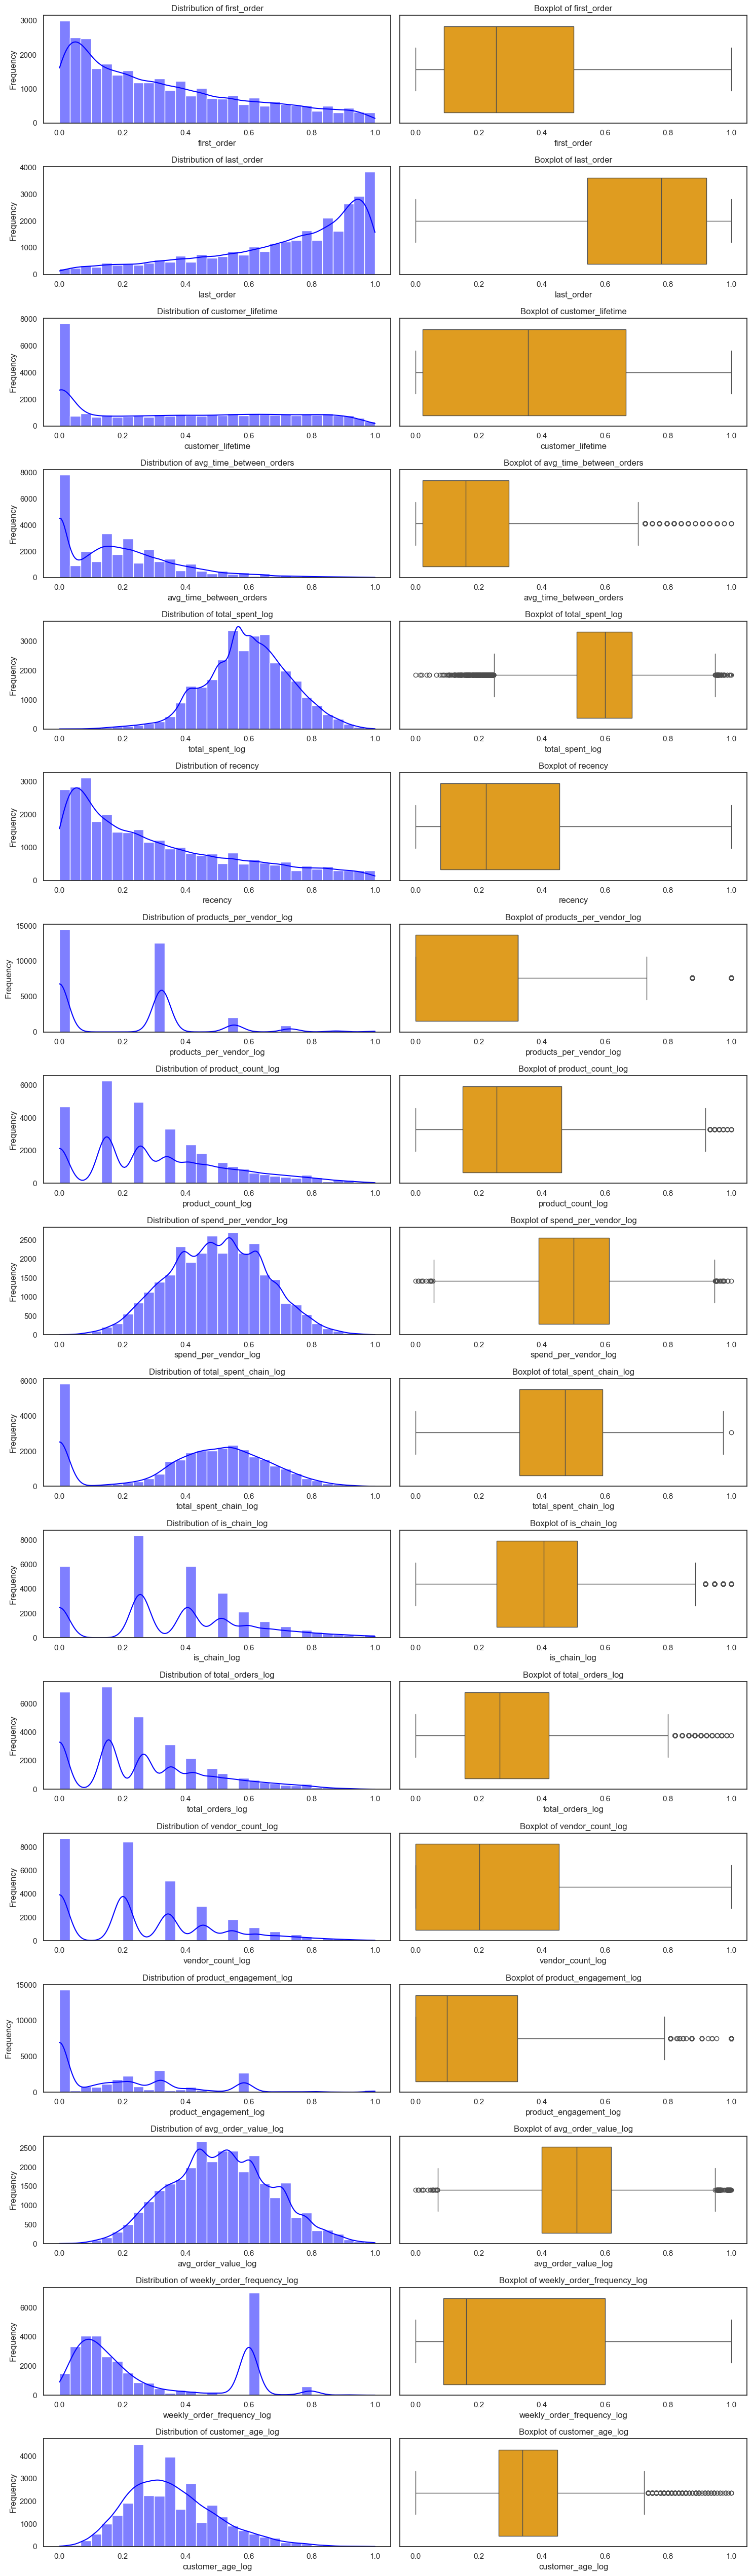

In [604]:
plot_distribution_and_boxplot(df_scaled,img_feats)

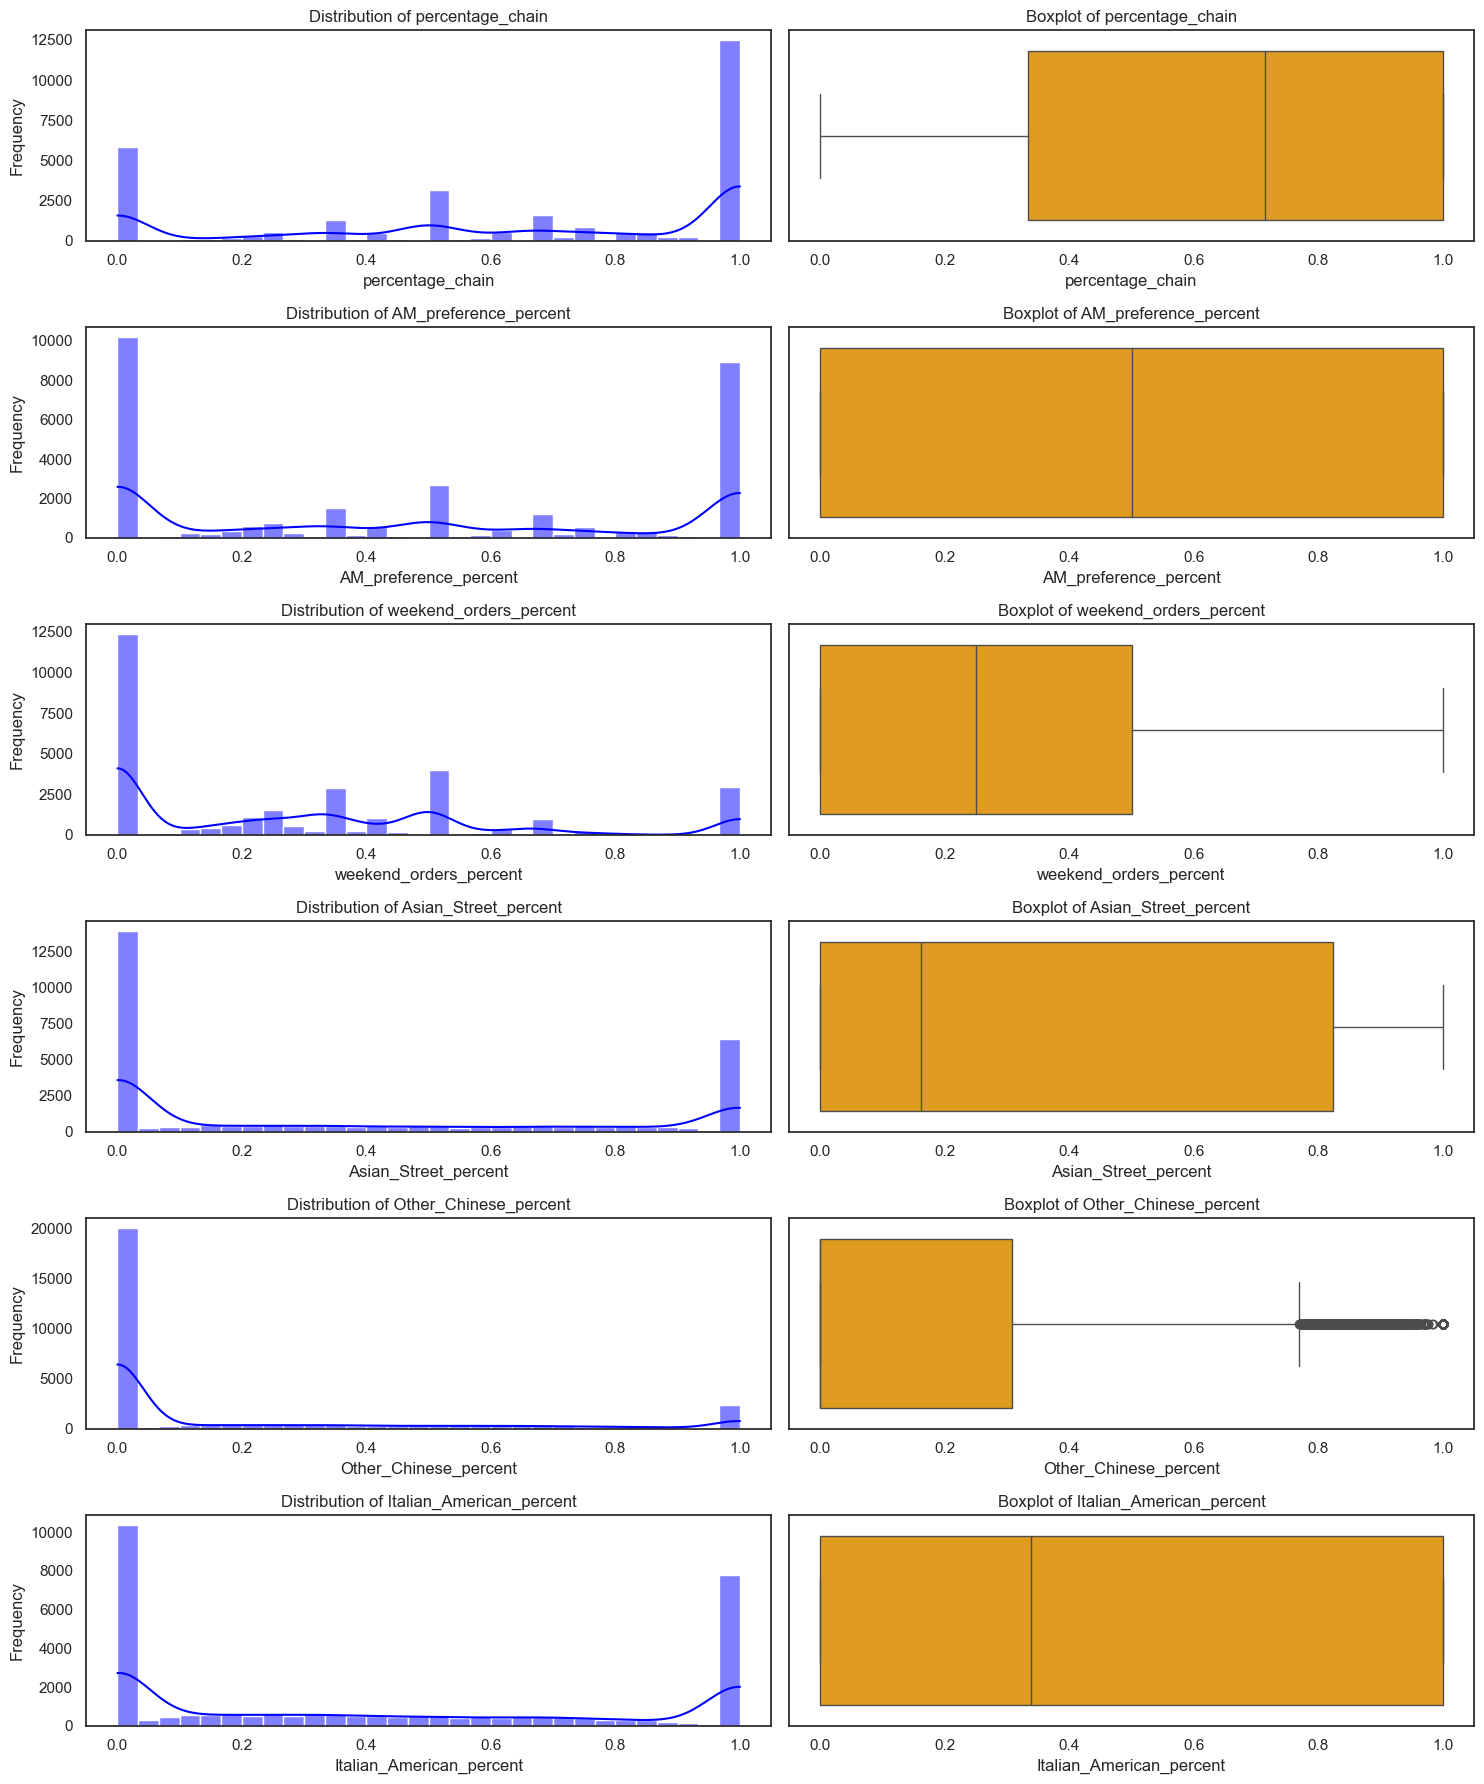

In [605]:
plot_distribution_and_boxplot(df_scaled,percents)

<h2>3.7 One Hot Encoding</h2>

> Use this instead of scikit learns one hot encoding bnecause we want something simple.

In [606]:
df_encoded = pd.get_dummies(df_scaled, columns=new_cat_cols)
df_encoded

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,last_promo_DELIVERY,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,payment_method_CARD,payment_method_CASH,payment_method_DIGI,customer_activity_Active,customer_activity_Churning,customer_activity_Recent
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,18,2,5,1,0.0,0.011111,0.000000,0.000000,0.000000,0.0,...,True,False,False,False,False,False,True,False,True,False
5d272b9dcb,17,2,2,2,0.0,0.011111,0.055318,0.022287,0.000000,0.0,...,False,True,False,False,False,False,True,False,True,False
f6d1b2ba63,38,1,2,2,0.0,0.011111,0.039698,0.000000,0.000000,0.0,...,False,True,False,False,False,True,False,False,True,False
180c632ed8,25,2,3,1,0.0,0.022222,0.000000,0.047782,0.000000,0.0,...,True,False,False,False,False,False,True,False,True,False
4eb37a6705,20,2,5,0,0.0,0.022222,0.062869,0.142543,0.000000,0.0,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,30,1,1,1,0.0,0.000000,0.000000,0.000000,0.093748,0.0,...,False,False,True,False,False,False,True,False,True,False
f6b6709018,24,1,1,0,0.0,0.000000,0.077843,0.000000,0.000000,0.0,...,True,False,False,False,False,False,True,False,True,False
f74ad8ce3f,24,1,1,1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,False,False,False,True,False,False,True,False,True,False


In [607]:
new_cat_cols = df_encoded.select_dtypes(include='bool').columns.tolist()

In [608]:
new_cat_cols

['customer_region_2360',
 'customer_region_2440',
 'customer_region_2490',
 'customer_region_4140',
 'customer_region_4660',
 'customer_region_8370',
 'customer_region_8550',
 'customer_region_8670',
 'last_promo_DELIVERY',
 'last_promo_DISCOUNT',
 'last_promo_FREEBIE',
 'last_promo_NO PROMO',
 'payment_method_CARD',
 'payment_method_CASH',
 'payment_method_DIGI',
 'customer_activity_Active',
 'customer_activity_Churning',
 'customer_activity_Recent']

<h1 id='multivariate'>4. Feature Selection</h1>

In [609]:
# Remove columns with "percent" in their names
new_num_cols_without_percent = [col for col in new_num_cols_transformed if "percent" not in col.lower()]
new_num_cols_without_percent = [col for col in new_num_cols_without_percent if col not in dow_cols]
new_num_cols_without_percent = [col for col in new_num_cols_without_percent if col not in hr_cols]
new_num_cols_without_percent = [col for col in new_num_cols_without_percent if col not in CUI_cols]


print(new_num_cols_without_percent)

['first_order', 'last_order', 'customer_lifetime', 'avg_time_between_orders', 'total_spent_log', 'recency', 'products_per_vendor_log', 'product_count_log', 'spend_per_vendor_log', 'total_spent_chain_log', 'is_chain_log', 'total_orders_log', 'vendor_count_log', 'product_engagement_log', 'avg_order_value_log', 'weekly_order_frequency_log', 'customer_age_log']


In [610]:
from scipy.stats import kstest

results = {}


for col in new_num_cols_without_percent:
    data = df_encoded[col]
    stat, p_value = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    results[col] = {'KS Stat': stat, 'p-value': p_value}

# Convert results to a DataFrame for better readability
ks_results_df = pd.DataFrame.from_dict(results, orient='index')
ks_results_df

,KS Stat,p-value
first_order,0.114523,0.000000e+00
last_order,0.131746,0.000000e+00
customer_lifetime,0.124266,0.000000e+00
avg_time_between_orders,0.139894,0.000000e+00
total_spent_log,0.035383,1.241973e-33
recency,0.131746,0.000000e+00
products_per_vendor_log,0.297017,0.000000e+00
product_count_log,0.130697,0.000000e+00
spend_per_vendor_log,0.022167,1.850929e-13
total_spent_chain_log,0.151167,0.000000e+00


> Most is not normally transformed. So we should use spearman for correlation.

In [611]:
# Calculate the Spearman correlation matrix
corr  = df_encoded[new_num_cols_without_percent].corr(method='pearson')

# Display the correlation matrix
corr 

,first_order,last_order,customer_lifetime,avg_time_between_orders,total_spent_log,recency,products_per_vendor_log,product_count_log,spend_per_vendor_log,total_spent_chain_log,is_chain_log,total_orders_log,vendor_count_log,product_engagement_log,avg_order_value_log,weekly_order_frequency_log,customer_age_log
first_order,1.000000,0.258899,-0.627212,-0.437085,-0.296926,-0.258899,-0.147705,-0.449127,0.028986,-0.280623,-0.367683,-0.472256,-0.435816,0.006355,0.135559,0.483724,0.004160
last_order,0.258899,1.000000,0.589908,0.400764,0.357539,-1.000000,0.161068,0.458557,0.043651,0.252222,0.318242,0.480314,0.439229,0.000628,-0.065881,-0.465273,0.012449
customer_lifetime,-0.627212,0.589908,1.000000,0.688545,0.536520,-0.589908,0.253353,0.745212,0.010966,0.437970,0.563985,0.782090,0.718499,-0.004806,-0.166446,-0.779549,0.006561
avg_time_between_orders,-0.437085,0.400764,0.688545,1.000000,0.151123,-0.400764,0.049475,0.190725,-0.048509,0.134759,0.134975,0.209213,0.215710,-0.050159,-0.094972,-0.810711,-0.000653
total_spent_log,-0.296926,0.357539,0.536520,0.151123,1.000000,-0.357539,0.475697,0.781481,0.692060,0.493039,0.342204,0.679300,0.625846,0.446050,0.579841,-0.378861,0.009238
recency,-0.258899,-1.000000,-0.589908,-0.400764,-0.357539,1.000000,-0.161068,-0.458557,-0.043651,-0.252222,-0.318242,-0.480314,-0.439229,-0.000628,0.065881,0.465273,-0.012449
products_per_vendor_log,-0.147705,0.161068,0.253353,0.049475,0.475697,-0.161068,1.000000,0.490748,0.591674,0.164731,0.142985,0.349219,0.028283,0.546114,0.258889,-0.171470,0.010015
product_count_log,-0.449127,0.458557,0.745212,0.190725,0.781481,-0.458557,0.490748,1.000000,0.202136,0.572419,0.679860,0.955158,0.869094,0.301686,-0.005370,-0.512974,0.009250
spend_per_vendor_log,0.028986,0.043651,0.010966,-0.048509,0.692060,-0.043651,0.591674,0.202136,1.000000,0.100240,-0.207549,0.039286,-0.123374,0.554565,0.887766,0.033554,0.007848
total_spent_chain_log,-0.280623,0.252222,0.437970,0.134759,0.493039,-0.252222,0.164731,0.572419,0.100240,1.000000,0.848414,0.548286,0.566103,0.156093,0.047084,-0.318193,0.003377


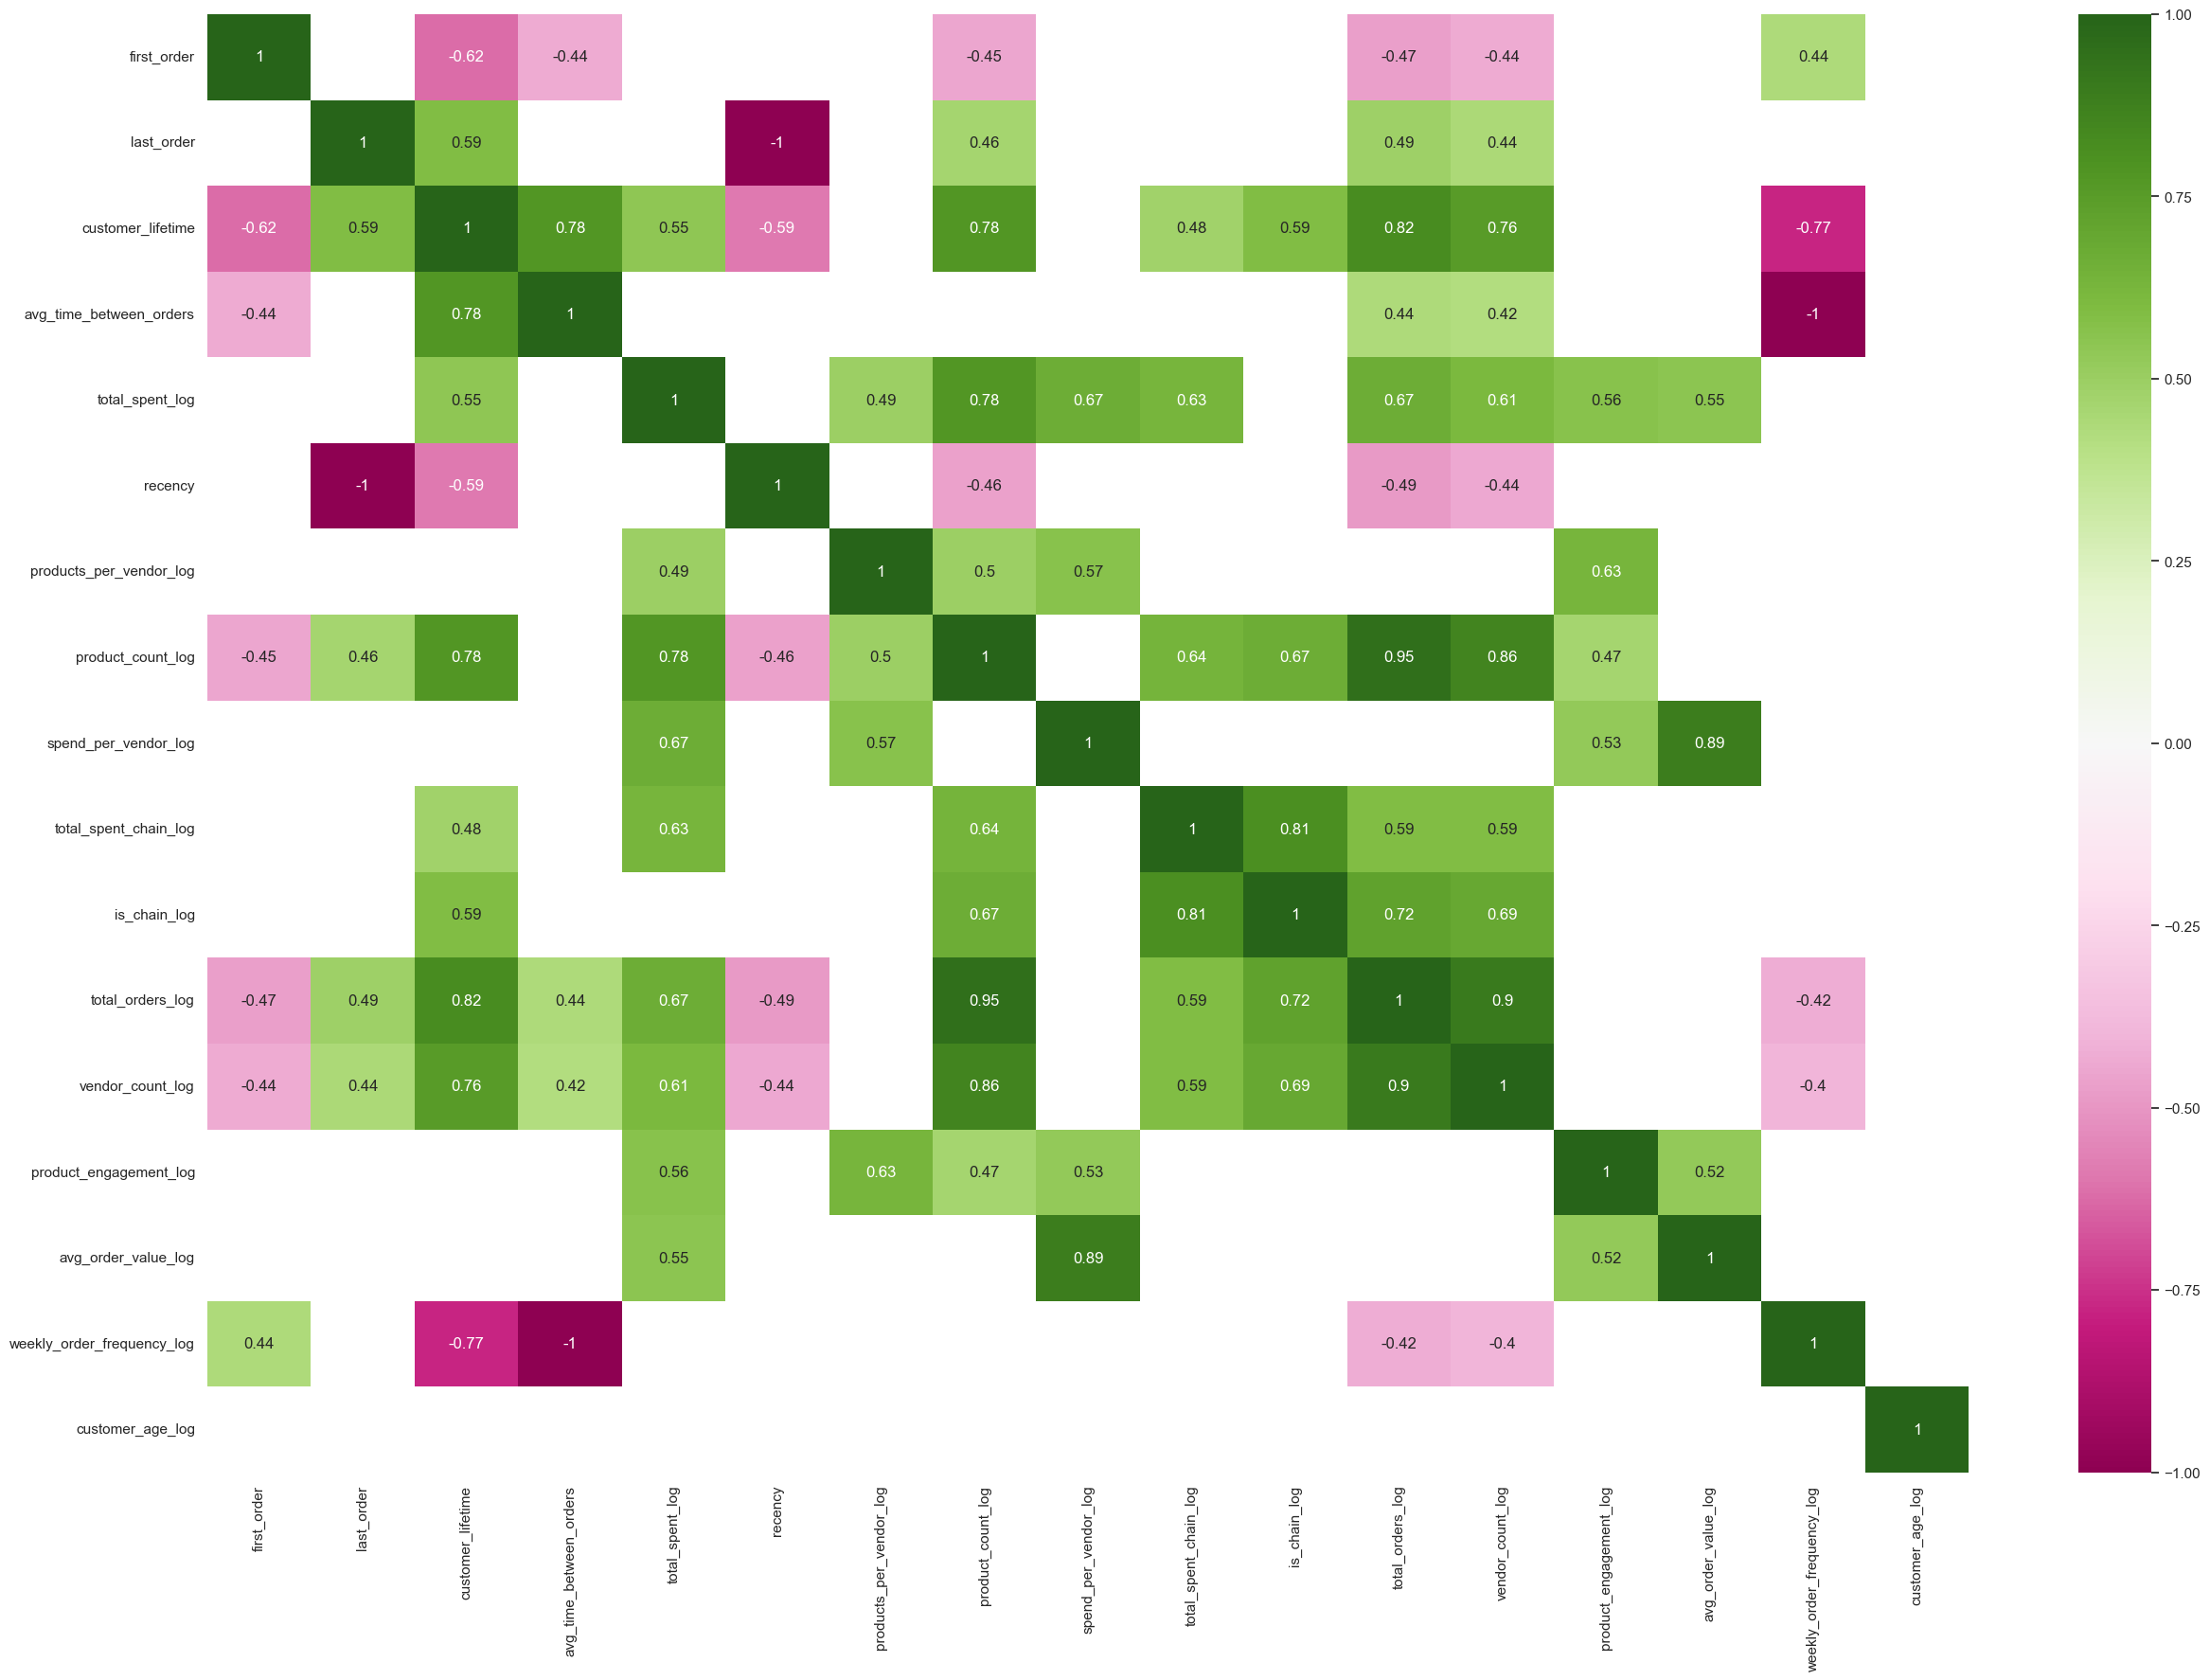

In [612]:
corr  = df_encoded[new_num_cols_without_percent].corr(method='spearman')

lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
plt.figure(figsize = (30,20))
sns.heatmap(corr[(abs(corr) >= 0.4)],
            annot=True,
            cmap='PiYG',
            center=0);

In [613]:
cor_spearman = df_encoded[new_num_cols_transformed].corr(method='pearson')

correlation_pairs = cor_spearman.unstack().reset_index()

correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter the table for correlations > 0.8 or < -0.8 and exclude self-correlations
strong_correlations = correlation_pairs[
    ((correlation_pairs['Correlation'] > 0.8) | (correlation_pairs['Correlation'] < -0.8)) &
    (correlation_pairs['Feature_1'] != correlation_pairs['Feature_2'])
]

strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])

strong_correlations


,Feature_1,Feature_2,Correlation
4134,product_count_log,total_orders_log,0.955158
4411,total_orders_log,vendor_count_log,0.900297
4206,spend_per_vendor_log,avg_order_value_log,0.887766
4135,product_count_log,vendor_count_log,0.869094
4271,total_spent_chain_log,is_chain_log,0.848414
3517,avg_time_between_orders,weekly_order_frequency_log,-0.810711
123,last_order,recency,-1.000000


In [614]:
to_drop = ['product_count_log','vendor_count_log','last_order','customer_age', "is_chain_log", "avg_order_value_log", "customer_age_log"]
img = [item for item in new_num_cols_without_percent if item not in to_drop]

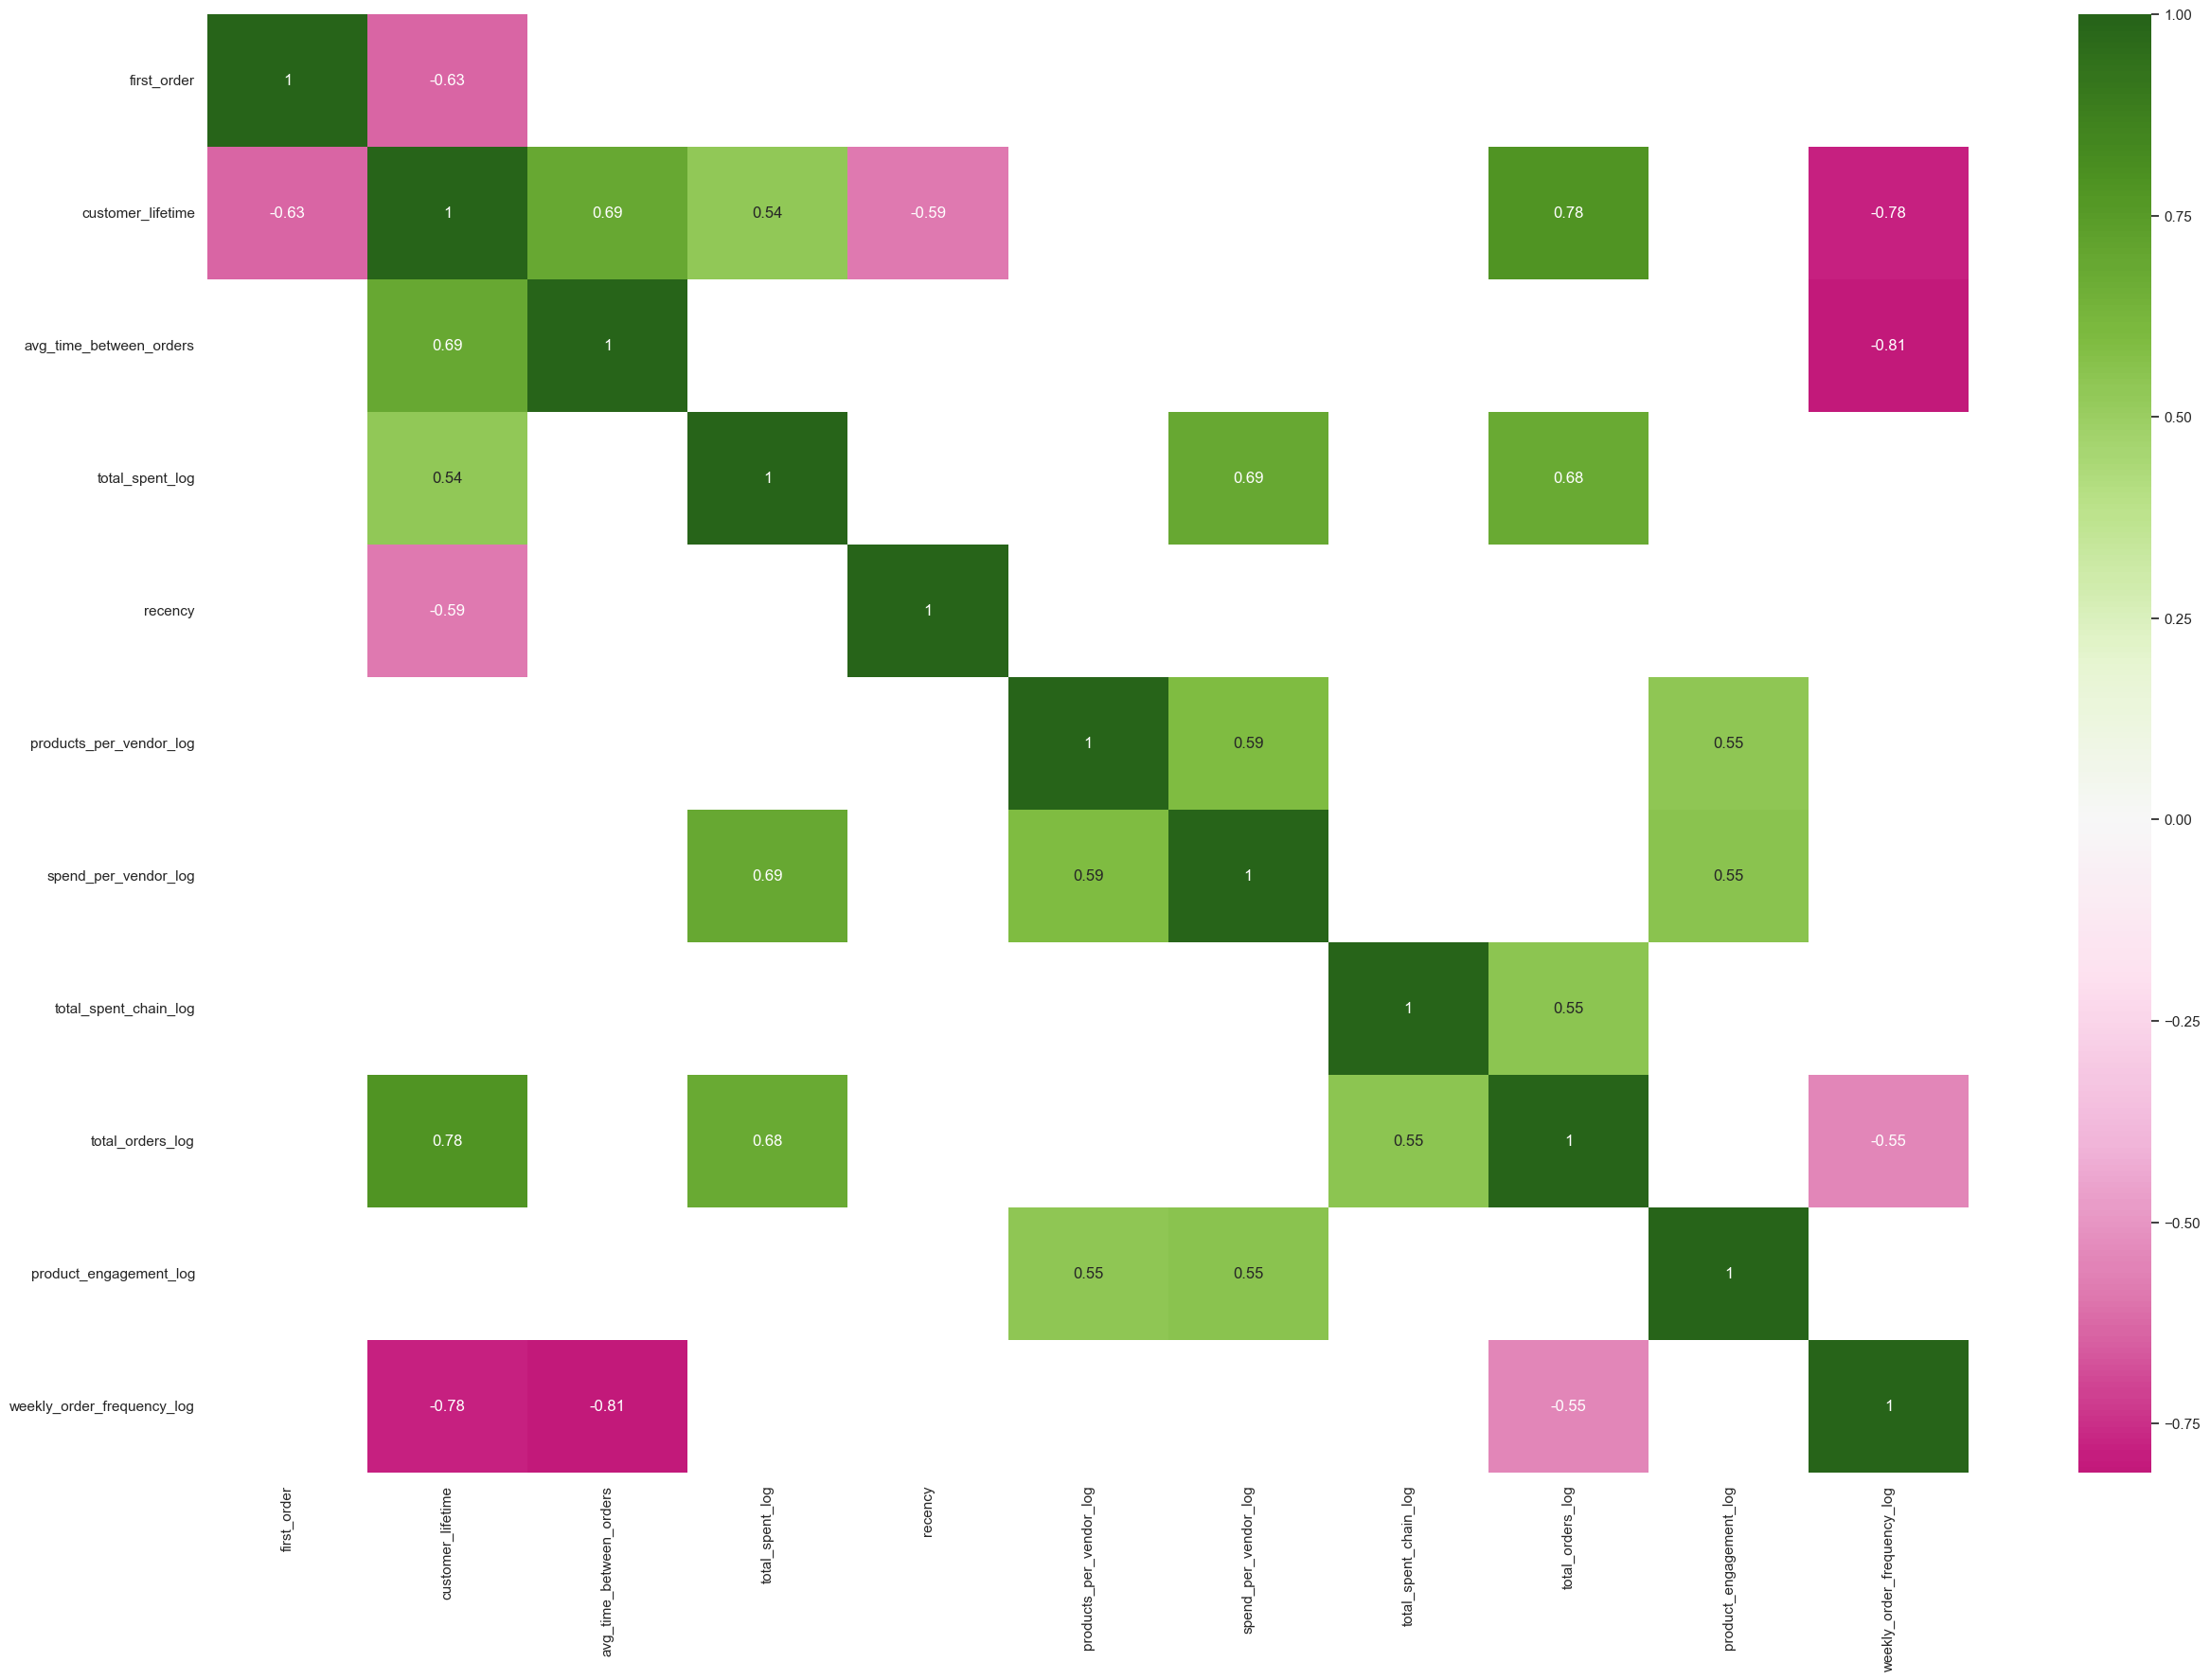

In [615]:
corr  = df_encoded[img].corr(method='pearson')

lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
plt.figure(figsize = (30,20))
sns.heatmap(corr[(abs(corr) >= 0.5)],
            annot=True,
            cmap='PiYG',
            center=0);

> Drop the following: product_count ; vendor_count ; total_orders ; avg_time_between_orders

> Drop these for high correlation and no correlation

In [616]:
df_final = df_encoded.copy()

<h1>5. DBScan for Outliers</h1>

In [622]:
columns_to_use = ['total_spent_log',
                'total_orders_log',
                'spend_per_vendor_log',
                "total_spent_chain_log", 
                "Asian_Street_percent",
                "Other_Chinese_percent",
                "Italian_American_percent",
                "AM_preference_percent",]

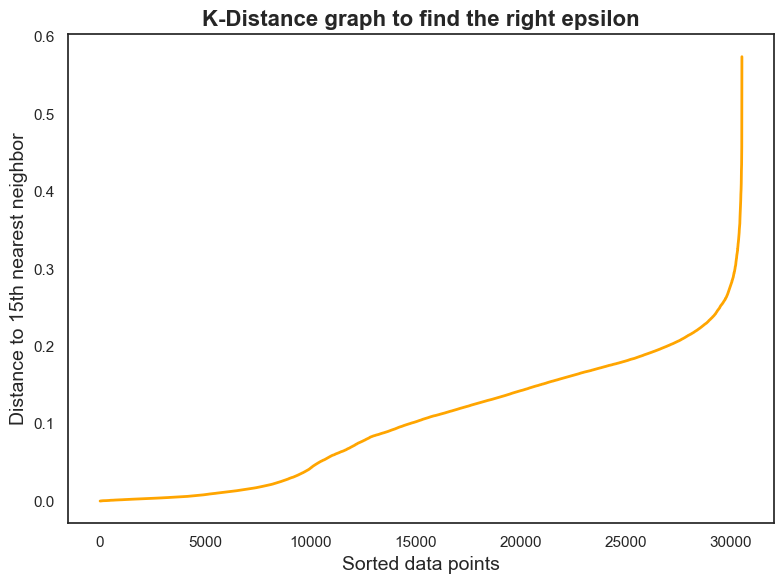

In [623]:
k_distance_graph(df_final,columns_to_use)

In [624]:
eps_value = 0.28
min_samples_value = 2 * len(columns_to_use) 

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_final[columns_to_use])

outliers = dbscan_labels == -1

num_outliers = outliers.sum()
print(f"Number of outliers removed: {num_outliers}")

Number of outliers removed: 114


In [625]:
df_final = df_final[~outliers]


In [626]:
df_final.to_csv('PREPROCESSED_DATASET.csv', index=True)